In [442]:
from __future__ import print_function, division
from PIL import Image
from torchvision.utils import make_grid

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

## Trained Models

In [443]:
models = {}

model_resnet50 = torchvision.models.resnet50(pretrained=True)
model_resnet50.name = 'resnet50'
models['resnet50'] = model_resnet50

model_alexnet = torchvision.models.alexnet(pretrained=True)
model_alexnet.name = 'alexnet'
models['alexnet'] = model_alexnet

model_vgg11 = torchvision.models.vgg11(pretrained=True)
model_vgg11.name = 'vgg11'
models['vgg11'] = model_vgg11

# model_resnet50.cuda()
# model_alexnet.cuda()
# model_vgg11.cuda()

In [444]:
# remove last layer

for model in models:
    if 'resnet' in model:
        models[model].fc = torch.nn.Sequential()
    else:
        list(models[model].children())[-1][-1] = torch.nn.Sequential()

In [445]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [446]:
layer_names = {}

In [447]:
model_resnet50.fc

Sequential()

### Resnet50

In [448]:
# ResNet50
layer_names[model_resnet50.name] = []

model_resnet50.conv1.register_forward_hook(get_activation('conv1'))
layer_names[model_resnet50.name].append('conv1')

# model_resnet50.layer1[0].register_forward_hook(get_activation('layer1_bottleneck1'))
# layer_names[model_resnet50.name].append('layer1_bottleneck1')

# model_resnet50.layer1[1].register_forward_hook(get_activation('layer1_bottleneck2'))
# layer_names[model_resnet50.name].append('layer1_bottleneck2')

# model_resnet50.layer1[2].register_forward_hook(get_activation('layer1_bottleneck3'))
# layer_names[model_resnet50.name].append('layer1_bottleneck3')

model_resnet50.layer2[0].register_forward_hook(get_activation('layer2_bottleneck1'))
layer_names[model_resnet50.name].append('layer2_bottleneck1')
# model_resnet50.layer2[1].register_forward_hook(get_activation('layer2_bottleneck2'))
# layer_names[model_resnet50.name].append('layer2_bottleneck2')
# model_resnet50.layer2[2].register_forward_hook(get_activation('layer2_bottleneck3'))
# layer_names[model_resnet50.name].append('layer2_bottleneck3')
# model_resnet50.layer2[3].register_forward_hook(get_activation('layer2_bottleneck4'))
# layer_names[model_resnet50.name].append('layer2_bottleneck4')

model_resnet50.layer3[0].register_forward_hook(get_activation('layer3_bottleneck1'))
layer_names[model_resnet50.name].append('layer3_bottleneck1')
# model_resnet50.layer3[1].register_forward_hook(get_activation('layer3_bottleneck2'))
# layer_names[model_resnet50.name].append('layer3_bottleneck2')
# model_resnet50.layer3[2].register_forward_hook(get_activation('layer3_bottleneck3'))
# layer_names[model_resnet50.name].append('layer3_bottleneck3')
# model_resnet50.layer3[3].register_forward_hook(get_activation('layer3_bottleneck4'))
# layer_names[model_resnet50.name].append('layer3_bottleneck4')
# model_resnet50.layer3[4].register_forward_hook(get_activation('layer3_bottleneck5'))
# layer_names[model_resnet50.name].append('layer3_bottleneck5')
# model_resnet50.layer3[5].register_forward_hook(get_activation('layer3_bottleneck6'))
# layer_names[model_resnet50.name].append('layer3_bottleneck6')

model_resnet50.layer4[0].register_forward_hook(get_activation('layer4_bottleneck1'))
layer_names[model_resnet50.name].append('layer4_bottleneck1')
# model_resnet50.layer4[1].register_forward_hook(get_activation('layer4_bottleneck2'))
# layer_names[model_resnet50.name].append('layer4_bottleneck2')
# model_resnet50.layer4[2].register_forward_hook(get_activation('layer4_bottleneck3'))
# layer_names[model_resnet50.name].append('layer4_bottleneck3')

model_resnet50.avgpool.register_forward_hook(get_activation('avgpool'))
layer_names[model_resnet50.name].append('avgpool')

model_resnet50.fc.register_forward_hook(get_activation('final'))
layer_names[model_resnet50.name].append('final')

In [449]:
layer_names


{'resnet50': ['conv1',
  'layer2_bottleneck1',
  'layer3_bottleneck1',
  'layer4_bottleneck1',
  'avgpool',
  'final']}

###  VGG11

In [450]:
layer_names[model_vgg11.name] = []

model_vgg11.features[0].register_forward_hook(get_activation('conv1'))
layer_names[model_vgg11.name].append('conv1')

# model_vgg11.features[3].register_forward_hook(get_activation('conv2'))
# layer_names[model_vgg11.name].append('conv2')

# model_vgg11.features[6].register_forward_hook(get_activation('conv3'))
# layer_names[model_vgg11.name].append('conv3')

model_vgg11.features[8].register_forward_hook(get_activation('conv4'))
layer_names[model_vgg11.name].append('conv4')

# model_vgg11.features[11].register_forward_hook(get_activation('conv5'))
# layer_names[model_vgg11.name].append('conv5')

model_vgg11.features[13].register_forward_hook(get_activation('conv6'))
layer_names[model_vgg11.name].append('conv6')

# model_vgg11.features[16].register_forward_hook(get_activation('conv7'))
# layer_names[model_vgg11.name].append('conv7')

model_vgg11.features[18].register_forward_hook(get_activation('conv8'))
layer_names[model_vgg11.name].append('conv8')


model_vgg11.avgpool.register_forward_hook(get_activation('avgpool'))
layer_names[model_vgg11.name].append('avgpool')

model_vgg11.classifier[6].register_forward_hook(get_activation('final'))
layer_names[model_vgg11.name].append('final')

In [451]:
layer_names

{'resnet50': ['conv1',
  'layer2_bottleneck1',
  'layer3_bottleneck1',
  'layer4_bottleneck1',
  'avgpool',
  'final'],
 'vgg11': ['conv1', 'conv4', 'conv6', 'conv8', 'avgpool', 'final']}

### Alexnet

In [452]:
layer_names[model_alexnet.name]=[]

model_alexnet.features[0].register_forward_hook(get_activation('conv1'))
layer_names[model_alexnet.name].append('conv1')

model_alexnet.features[3].register_forward_hook(get_activation('conv2'))
layer_names[model_alexnet.name].append('conv2')

model_alexnet.features[6].register_forward_hook(get_activation('conv3'))
layer_names[model_alexnet.name].append('conv3')

model_alexnet.features[8].register_forward_hook(get_activation('conv4'))
layer_names[model_alexnet.name].append('conv4')

model_alexnet.features[10].register_forward_hook(get_activation('conv5'))
layer_names[model_alexnet.name].append('conv5')

model_alexnet.avgpool.register_forward_hook(get_activation('avgpool'))
layer_names[model_alexnet.name].append('avgpool')

model_alexnet.classifier[6].register_forward_hook(get_activation('final'))
layer_names[model_alexnet.name].append('final')

In [453]:
layer_names

{'resnet50': ['conv1',
  'layer2_bottleneck1',
  'layer3_bottleneck1',
  'layer4_bottleneck1',
  'avgpool',
  'final'],
 'vgg11': ['conv1', 'conv4', 'conv6', 'conv8', 'avgpool', 'final'],
 'alexnet': ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'avgpool', 'final']}

### Untrained models

In [454]:
untrained_resnet18 = torchvision.models.resnet18()
untrained_resnet50 = torchvision.models.resnet50()
untrained_alexnet = torchvision.models.alexnet()
untrained_vgg11 = torchvision.models.vgg11()

# untrained_resnet18.cuda()
# untrained_resnet50.cuda()
# untrained_alexnet.cuda()
# untrained_vgg11.cuda()

### data

Bees + Ants - P = 150

Flowers - P = 500

In [455]:
data_dir = './data'

In [456]:
# Image preprocessing
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 8

In [457]:
len(os.listdir(os.path.join(im_path, 'tulips')))

799

In [458]:
def generate_batch(i, img_dir, label, batch_size):
    batch=[]
    label_dir = os.path.join(img_dir, label)
    images = os.listdir(label_dir)
    for img in images[i*batch_size:(i+1)*batch_size]:
        try:
            x = Image.open(os.path.join(label_dir, img)).convert('RGB')
            batch.append(preprocess(x))
        except OSError: 
            pass
    res = torch.Tensor()
    if len(batch) > 0:
        res = torch.stack(batch)
    return res

In [459]:
from torchvision.utils import make_grid
def show_grid(im_tensor, nrow=8, title=None):
    im_grid = make_grid(im_tensor, nrow=nrow, padding=2)
    im_grid = im_grid.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    im_grid = std * im_grid + mean
    im_grid = np.clip(im_grid, 0, 1)
    
    plt.figure(figsize=(15,2*len(input_tensor)//nrow))
    plt.imshow(im_grid)
    plt.axis('off')
    plt.title(title)

In [460]:
generate_batch(32, data_dir, labels[i], batch_size)

tensor([[[[-0.2684, -0.6281, -0.9534,  ...,  1.4612,  1.4783,  1.4783],
          [-0.3369, -0.6965, -1.0048,  ...,  1.4440,  1.4783,  1.4783],
          [-0.4054, -0.7822, -0.9877,  ...,  1.4440,  1.4783,  1.4783],
          ...,
          [-0.9363, -0.8849, -0.7993,  ...,  1.4440,  1.3755,  1.4098],
          [-0.9705, -0.9192, -0.8335,  ...,  1.4783,  1.4612,  1.5297],
          [-0.9192, -0.9192, -0.8507,  ...,  1.4612,  1.4954,  1.5125]],

         [[-2.0182, -2.0357, -2.0182,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0007, -2.0182, -2.0007,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-1.1779, -1.2129, -1.1779,  ...,  1.6057,  1.5182,  1.5532],
          [-1.1429, -1.1779, -1.1429,  ...,  1.6232,  1.5882,  1.6933],
          [-1.0203, -1.1078, -1.1253,  ...,  1.6057,  1.6408,  1.6933]],

         [[-1.7347, -1.6999, -1.7347,  ..., -1.2641, -1.1944, -1.1770],
          [-1.7522, -1.7696, -

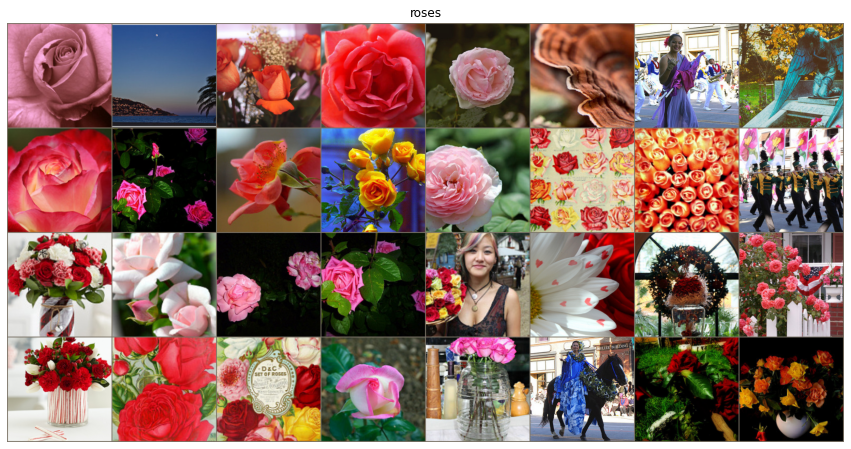

In [461]:
batch_size = 32
i = 3

labels = ['ants', 'bees', 'dandelion', 'roses', 'sunflowers', 'tulips']
batch = generate_batch(i, data_dir, labels[i], batch_size)

show_grid(batch, title=labels[i])

## Layerwise Embeddings

### get embeddings

In [476]:
emb_dir = './embeddings'

In [479]:
#input layer subsamples
N = 2048
subsample_input = np.random.choice(np.arange(224*224*3), N)
subsample_input.shape

(2048,)

In [480]:
batch.reshape(batch.shape[0],-1)[:,subsample_input].shape

torch.Size([32, 2048])

In [491]:
for model_name in models:
    models[model_name].eval()
    activation = {}
    # find random neurons to subsample
    print(model_name)
    with torch.no_grad():
        models[model_name](batch)   # test batch

    subsample = []
    for layer in layer_names[model_name]:
        M = np.prod(activation[layer].shape[1:])
        subsample.append(np.random.choice(np.arange(M), N))
    
    if not os.path.isdir(os.path.join(emb_dir, model_name)):
        os.mkdir(os.path.join(emb_dir, model_name))
    
    model_path = os.path.join(emb_dir, model_name)
    
    layers = np.array(['input'] + layer_names[model_name][:])
    
    for label in labels:
        print(label)
        embeddings = []
        
        if label in ['ants', 'bees']:
            P = 150
        else:
            P = 500
        
        batch_index = 0
        batch_size = 32
        curr_batch = generate_batch(batch_index, data_dir, label, batch_size)
        
        while (len(curr_batch) > 0):
            
            with torch.no_grad():
                _ = models[model_name](curr_batch)
                
            batch_embeddings = [curr_batch.reshape(curr_batch.shape[0],-1)[:,subsample_input]]
            for layer, index in zip(layer_names[model_name], subsample):
                output = activation[layer]
                output = output.reshape(output.shape[0],-1)[:,index]
                batch_embeddings.append(output.numpy())
                
            embeddings.append(np.stack(batch_embeddings, axis = 1))    
            batch_index += 1
            curr_batch = generate_batch(batch_index, data_dir, label, batch_size)
        
        
        embeddings = np.concatenate(embeddings)
        
        if not os.path.isdir(os.path.join(model_path, label)):
            os.mkdir(os.path.join(model_path, label))
            
        np.save(os.path.join(model_path, label, 'embeddings.npy'), embeddings)
        np.save(os.path.join(model_path, label, 'layer_names.npy'), layers)
        
    models[model_name].train()

resnet50
ants
bees
dandelion
roses
sunflowers
tulips
alexnet
ants
bees
dandelion
roses
sunflowers
tulips
vgg11
ants
bees
dandelion
roses
sunflowers
tulips


In [498]:
resnet_50_ants = np.load(os.path.join(emb_dir, 'resnet50', 'ants', 'embeddings.npy'))
resnet_50_layer_names = np.load(os.path.join(emb_dir, 'resnet50', 'ants', 'layer_names.npy'))

In [499]:
resnet_50_ants.shape

(194, 7, 2048)

In [502]:
resnet_50_layer_names

array(['input', 'conv1', 'layer2_bottleneck1', 'layer3_bottleneck1',
       'layer4_bottleneck1', 'avgpool', 'final'], dtype='<U18')